# Plots to fix

## Data-Ink Ratio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
time = np.linspace(0, 10, 100)
values = np.sin(time) + np.random.normal(0, 0.2, size=100)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = axes[0]

fig.set_facecolor('mistyrose')    
ax1.set_facecolor('lavender')     

ax1.plot(time, values, 
         linewidth=4, 
         marker='o', 
         markersize=8, 
         markerfacecolor='yellow',
         markeredgecolor='red',
         color='blue')

for spine_name, spine in ax1.spines.items():
    spine.set_linewidth(3)
    spine.set_color('pink')

ax1.grid(color='gold', linestyle='-', linewidth=2)

ax1.set_title("Low Data-Ink Ratio", fontsize=16, color='red')
ax1.set_xlabel("Time (see units in caption)", fontsize=12, color='darkgreen')
ax1.set_ylabel("Value", fontsize=12, color='darkgreen')

ax1.text(2, 1.5, "Busy!", fontsize=14, color='purple',
         bbox=dict(boxstyle="round", fc="yellow", ec="black", lw=2))


ax2 = axes[1]

ax2.plot(time, values, color='black', linewidth=1)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.grid(False)

ax2.set_title("High Data-Ink Ratio", fontsize=14)
ax2.set_xlabel("Time (yr)")
ax2.set_ylabel("Value")

fig.set_facecolor('white')
ax2.set_facecolor('white')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#this is not a real transit model so do not use for research!! use BATMAN
def generate_transit_light_curve(num_points=100_000, 
                                 transit_depth=0.01, 
                                 transit_duration=0.01, 
                                 noise_level=0.002, 
                                 time_span=0.1):
    time = np.linspace(-time_span/2, time_span/2, num_points)
    flux = np.ones(num_points)
    half_dur = transit_duration / 2
    in_transit = np.abs(time) < half_dur
    flux[in_transit] = 1.0 - transit_depth
    noise = np.random.normal(0, noise_level, num_points)
    flux_noisy = flux + noise
    return time, flux_noisy

def bin_data(time, flux, num_bins=100):
    t_min, t_max = np.min(time), np.max(time)
    bins = np.linspace(t_min, t_max, num_bins + 1)
    indices = np.digitize(time, bins)
    
    binned_time = []
    binned_flux = []
    binned_flux_err = []
    
    for i in range(1, len(bins)):
        bin_mask = (indices == i)
        bin_count = np.sum(bin_mask)
        if bin_count > 0:
            bin_times = time[bin_mask]
            bin_flux = flux[bin_mask]
            mean_t = np.mean(bin_times)
            mean_f = np.mean(bin_flux)
            sem_f = np.std(bin_flux) / np.sqrt(bin_count)  
            binned_time.append(mean_t)
            binned_flux.append(mean_f)
            binned_flux_err.append(sem_f)
    return np.array(binned_time), np.array(binned_flux), np.array(binned_flux_err)


time, flux_noisy = generate_transit_light_curve(
    num_points=100_000,
    transit_depth=0.01,   
    transit_duration=0.01,
    noise_level=0.002,
    time_span=0.1        
)

binned_time, binned_flux, binned_flux_err = bin_data(time, flux_noisy, num_bins=10000)


plt.figure(figsize=(10,6))
plt.scatter(time, flux_noisy, s=2, color='gray', alpha=0.3, label='Raw Data')
plt.errorbar(binned_time, binned_flux, yerr=binned_flux_err, 
             fmt='o', color='red', ecolor='pink', capsize=3, 
             label='Binned Data')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.grid(True)
plt.show()


## Scatterplot

“The greatest of all graphical designs” (Tufte pg 47)

- Purpose or Context of the Scatterplot*

“This scatterplot shows the relationship between X and Y variables.”
Briefly note why the scatterplot is relevant: Are you looking at correlation, outliers, or clustering?

- Clear Axis Labels and Scales

“X-axis: Variable or Measurement A”
“Y-axis: Variable or Measurement B”
Mention any units or scale transformations (e.g., log scale) to avoid confusion.

- Data Density or Overplotting

“Note the number of data points—transparency (alpha) is used to reveal overlapping points.”
If your data set is large, highlight whether you used jittering, binning, or alpha transparency to handle overplotting.

- Color or Marker Variations

“Different marker colors indicate categories A, B, C.”
If you encode additional variables with color or marker style, call that out on the plot or in a legend.

- Trend Line or Statistical Annotation

“A linear regression line (in red) suggests a positive correlation (R² = 0.78).”
Including a fitted line or correlation coefficient can help interpret relationships.

- Highlighting Outliers or Interesting Regions

“Outliers above the dashed line indicate unusually high values.”
You can annotate specific points or areas to guide attention to anomalies or patterns.

- Annotation for Key Takeaways

“The cluster on the left represents early-stage data.”
“The cluster on the right represents late-stage data.”
Brief captions can explain why certain clusters exist or what they represent.

- Legend Placement and Format

“Legend (top right) explains the color coding of categories.”
If your scatterplot uses multiple symbols or colors, mention the legend’s location and structure.

- Interpretation or Next Steps

“Points above line Y suggest further investigation into cause Z.”
Provide a short statement tying the visual pattern back to the broader question or hypothesis.

Length of x array: 299


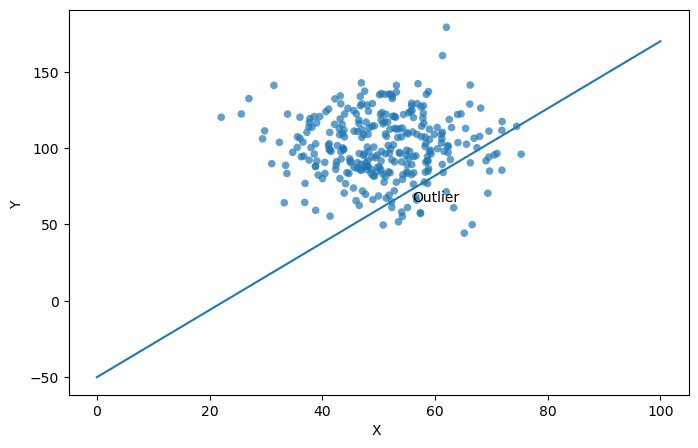

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.random.normal(loc=50, scale=10, size=300)
y = np.random.normal(loc=100, scale=20, size=300)

x = np.delete(x, 20)
y = np.delete(y, 20) # dont like that data point, get rid of it
print("Length of x array:", len(x))
plt.figure(figsize=(8, 5))


plt.scatter(
    x, 
    y, 
    s=30,        
    alpha=0.7,   
    edgecolors='none'
)

x_model = np.linspace(0, 100)
y_model = x_model * 2.2 -50

plt.plot(x_model, y_model)
plt.annotate("Outlier", (56, 65))
plt.xlabel("X ")
plt.ylabel("Y ")
#plt.xlim(50, 60)
#plt.ylim(60, 80)
plt.show()


# Chartjunk
Unnecessary or distracting visuals that do not convey meaningful information 

*Challenge*: Fix the plot below!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) * 10 + np.random.normal(0, 1, 100)
y2 = np.cos(x) * 8 + np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('lavenderblush')  # Figure background 

ax = plt.gca()
ax.set_facecolor('lightcyan')             # Axes background 

plt.grid(color='hotpink', linestyle='--', linewidth=2)

plt.plot(
    x, y,
    color='red',
    linewidth=3,
    linestyle='-.',
    marker='o',
    markerfacecolor='yellow',
    markeredgecolor='purple',
    markeredgewidth=2,
    label='Sine-ish Data'
)

plt.plot(
    x, y2,
    color='orange',
    linewidth=4,
    linestyle=':',
    marker='*',
    markersize=10,
    label='Cos-ish Data'
)

plt.legend(
    loc='upper right',
    fancybox=True,
    shadow=True,
    fontsize=14,
    title='Legend (Unnecessary Detail)'
)

plt.title(
    "An Example of Chartjunk Overload\n(Too Many Unnecessary Elements)",
    fontsize=20,
    fontweight='bold',
    color='blue',
    style='italic'
)

plt.xlabel("Time (Units of Mystery)", fontsize=14, color='magenta', fontweight='heavy')
plt.ylabel("Magnitude? (Arbitrary Scale)", fontsize=14, color='magenta', fontweight='heavy')

for spine in ax.spines.values():
    spine.set_linewidth(3)
    spine.set_color('green')

plt.text(1, 8, 'WOW! Look at this!\nBuy now!', color='darkgreen', fontsize=18, rotation=15)
plt.annotate(
    "Look Here!", 
    xy=(7, np.sin(7) * 10), 
    xytext=(8, 9),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=16,
    color='purple',
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="red", lw=2)
)

plt.show()
